**SCHEMA STRUCTURE TO UNDERSTAND RELATIONSHIPS**

![Chinook%20ERD[2].png](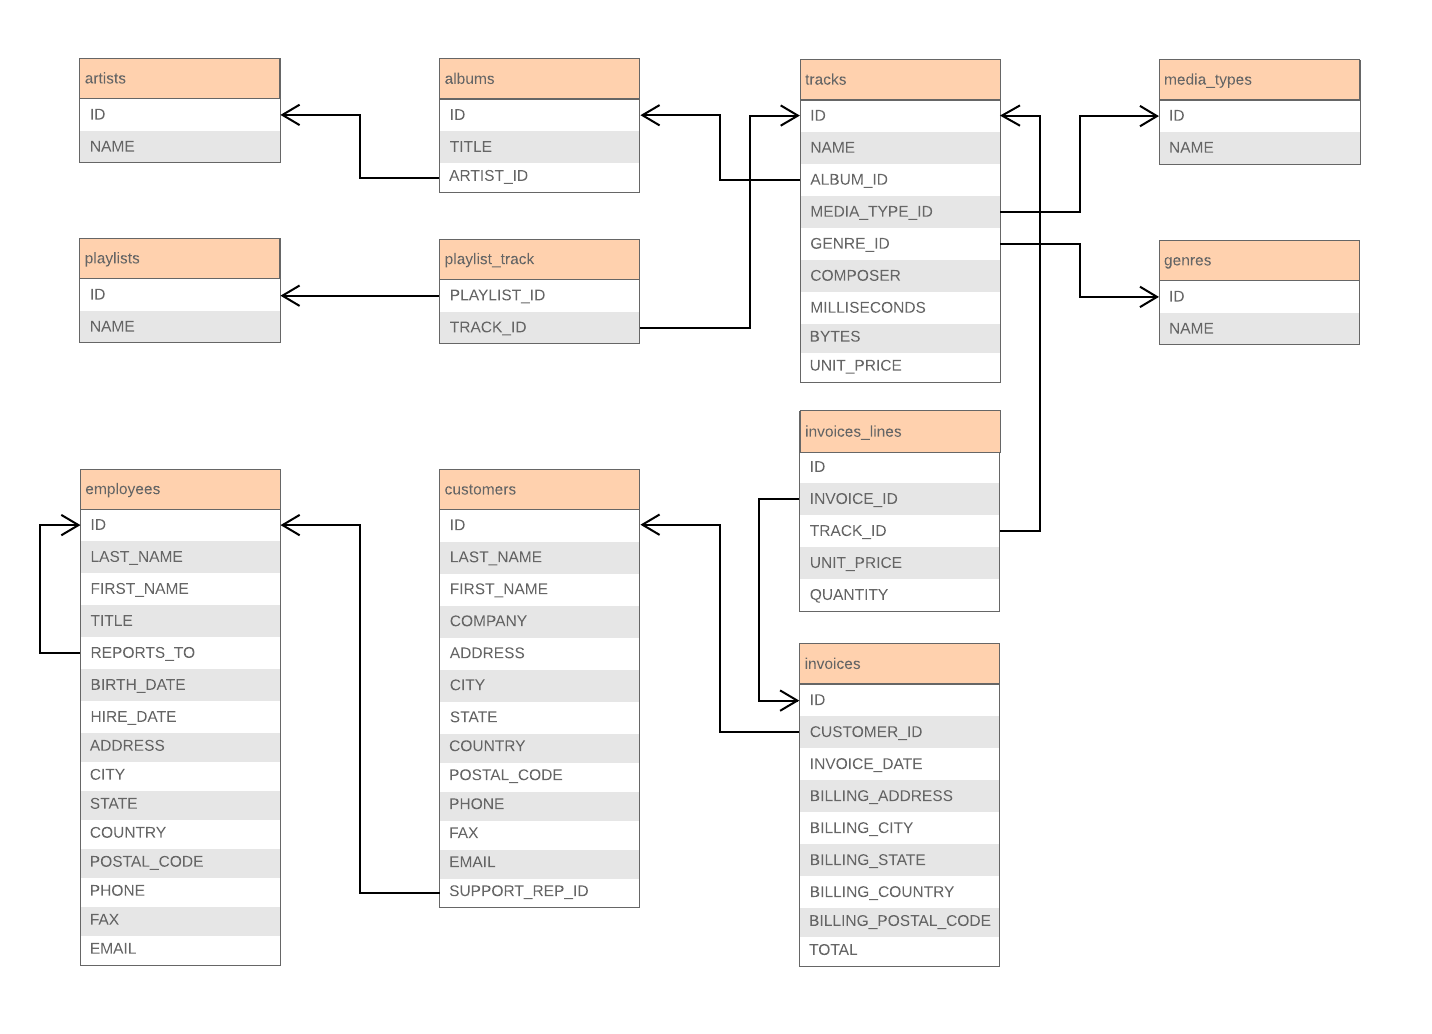)

In [1]:
# import libraries 
import pandas as pd
import sqlite3

filename = 'chinook.db'

# create a connection to the database: add code here 

connection= sqlite3.connect('chinook.db')

# end code here

In [2]:
# GET ALL TABLE NAMES

pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'",con=connection)

,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists


In [3]:
# Initiatilize All Tables from SQL to Pandas Dataframe to solve natively in Pandas as per instructions above 
Artists_tbl=pd.read_sql("SELECT * FROM artists",con=connection)  
Albums_tbl=pd.read_sql("SELECT * FROM albums",con=connection)
Tracks_tbl=pd.read_sql("SELECT * FROM tracks",con=connection)
Media_types_tbl=pd.read_sql("SELECT * FROM media_types",con=connection)  
Genres_tbl=pd.read_sql("SELECT * FROM genres",con=connection)
Playlist_tbl=pd.read_sql("SELECT * FROM playlists",con=connection)
Playlisttrack_tbl=pd.read_sql("SELECT * FROM playlist_track",con=connection)  
Invoices_tbl=pd.read_sql("SELECT * FROM invoices",con=connection)
Invoiceitems_tbl=pd.read_sql("SELECT * FROM invoice_items",con=connection)
Customers_tbl=pd.read_sql("SELECT * FROM customers",con=connection)  
Employees_tbl=pd.read_sql("SELECT * FROM employees",con=connection)
Sqlite_stat1_tbl=pd.read_sql("SELECT * FROM sqlite_stat1",con=connection)
Sqlite_sequence_tbl=pd.read_sql("SELECT * FROM sqlite_sequence",con=connection)

## Q1. From the customers table, find the number of customers from each country

In [1]:
query="SELECT * FROM customers"
pd.read_sql(query,con=connection)

NameError: name 'pd' is not defined

### SQL

In [7]:
query_Q1 = "SELECT trim(Country) as Country,count(*) as Numberofcustomers\
        FROM customers group by trim(Country) ORDER BY 2 DESC" 
pd.read_sql(query_Q1,con=connection)

,Country,Numberofcustomers
0,USA,13
1,Canada,8
2,France,5
3,Brazil,5
4,Germany,4
5,United Kingdom,3
6,Portugal,2
7,India,2
8,Czech Republic,2
9,Sweden,1


### PYTHON

In [8]:
Customers_tbl = pd.read_sql_query("SELECT * FROM customers", connection)
Customers_tbl['Country'].value_counts()

USA               13
Canada             8
France             5
Brazil             5
Germany            4
United Kingdom     3
Portugal           2
Czech Republic     2
India              2
Argentina          1
Chile              1
Italy              1
Poland             1
Hungary            1
Ireland            1
Belgium            1
Norway             1
Denmark            1
Austria            1
Finland            1
Spain              1
Sweden             1
Australia          1
Netherlands        1
Name: Country, dtype: int64

## Q2. From the track table, find the longest running track

In [9]:
query="SELECT * FROM tracks"
pd.read_sql(query,con=connection)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


### SQL

In [10]:
query_Q2 = "SELECT Name,max(Milliseconds) FROM tracks order by TrackId  "
pd.read_sql(query_Q2,con=connection)


,Name,max(Milliseconds)
0,Occupation / Precipice,5286953


### PYTHON

In [11]:
Tracks_tbl = pd.read_sql_query("SELECT * FROM tracks", connection)
Tracks_tbl.groupby('Name')['Milliseconds'].max().sort_values(ascending=False).head(1)

Name
Occupation / Precipice    5286953
Name: Milliseconds, dtype: int64

## Q3. From the invoice table, find the country with the highest sales 

In [12]:
query="SELECT * FROM invoices"
pd.read_sql(query,con=connection)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,2013-12-05 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,2013-12-06 00:00:00,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,2013-12-09 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91
410,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86


### SQL

In [13]:
query_Q3 = "SELECT BillingCountry,sum(Total) FROM invoices\
         group by BillingCountry order by 2 desc limit 1"
pd.read_sql(query_Q3,con=connection)

,BillingCountry,sum(Total)
0,USA,523.06


### PYTHON

In [14]:
Invoices_tbl = pd.read_sql_query("SELECT * FROM invoices", connection)
Invoices_tbl.groupby('BillingCountry')['Total'].sum().sort_values(ascending=False).head(1)

BillingCountry
USA    523.06
Name: Total, dtype: float64

## Q4. From the invoice table, find the City with highest Sale from January 2009 - April 2009

In [15]:
query="SELECT * FROM invoices"
pd.read_sql(query,con=connection)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,2013-12-05 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,2013-12-06 00:00:00,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,2013-12-09 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91
410,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86


### SQL

In [16]:
query_Q4 = "SELECT BillingCity,sum(Total),InvoiceDate FROM invoices\
         WHERE InvoiceDate > '2009-01-01 00:00:00' AND InvoiceDate <'2009-04-01 00:00:00 ' \
         group by BillingCity order by 2 desc limit 1 "
pd.read_sql(query_Q4,con=connection)

,BillingCity,sum(Total),InvoiceDate
0,Paris,15.84,2009-02-01 00:00:00


### PYTHON

In [17]:
Invoices_tbl = pd.read_sql_query("SELECT * FROM invoices", connection)
Invoices_tbl[(Invoices_tbl['InvoiceDate']>"2009-01-01 00:00:00") &
            (Invoices_tbl['InvoiceDate']<"2009-04-01 00:00:00")].groupby('BillingCity')['Total'].sum().sort_values(ascending=False).head(1)
             

BillingCity
Paris    15.84
Name: Total, dtype: float64

## Q5. From the customers table, find the total spendings of Customer Name = Roberto Almedia.

In [18]:
query="SELECT * FROM customers"
pd.read_sql(query,con=connection)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
5,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
6,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5
7,8,Daan,Peeters,None,Grétrystraat 63,Brussels,None,Belgium,1000,+32 02 219 03 03,None,daan_peeters@apple.be,4
8,9,Kara,Nielsen,None,Sønder Boulevard 51,Copenhagen,None,Denmark,1720,+453 3331 9991,None,kara.nielsen@jubii.dk,4
9,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4


In [19]:
query="SELECT * FROM invoices"
pd.read_sql(query,con=connection)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,2013-12-05 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,2013-12-06 00:00:00,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,2013-12-09 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91
410,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86


### SQL

In [20]:
query_Q5 = "SELECT customers.FirstName,customers.LastName,sum(Total) as Total \
         FROM customers\
         LEFT JOIN invoices ON customers.CustomerId=invoices.CustomerId\
         WHERE FirstName='Roberto'" 
pd.read_sql(query_Q5,con=connection)

,FirstName,LastName,Total
0,Roberto,Almeida,37.62


### PYTHON

In [21]:
Invoices_tbl = pd.read_sql_query("SELECT * FROM invoices", connection)
Customers_tbl = pd.read_sql_query("SELECT * FROM customers", connection)
Merge_tbl=pd.merge(Customers_tbl, Invoices_tbl, on='CustomerId', how='left')
Merge_tbl[(Merge_tbl['FirstName']=="Roberto")&(Merge_tbl['LastName']=="Almeida")].groupby('FirstName')['Total'].sum()


FirstName
Roberto    37.62
Name: Total, dtype: float64

## Q6. From the track table, find the artists with the most rock genre songs.

In [22]:
query="SELECT * FROM tracks"
pd.read_sql(query,con=connection)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


In [23]:
query="SELECT * FROM genres"
pd.read_sql(query,con=connection)

,GenreId,Name,genre_classification
0,1,Rock,First_Class
1,2,Jazz,First_Class
2,3,Metal,First_Class
3,4,Alternative & Punk,Second_Class
4,5,Rock And Roll,Second_Class
5,6,Blues,Second_Class
6,7,Latin,Second_Class
7,8,Reggae,Third_Class
8,9,Pop,Third_Class
9,10,Soundtrack,Third_Class


### SQL

In [24]:
query_Q6 = "SELECT tracks.Composer,genres.Name as Genretype,Count(TrackID) as total\
         FROM tracks\
         LEFT JOIN genres ON tracks.GenreID=genres.GenreID\
         WHERE GenreType='Rock' AND Composer <> 'None'\
         group by Composer\
         ORDER BY 3 DESC LIMIT 1"
pd.read_sql(query_Q6,con=connection)

,Composer,Genretype,total
0,U2,Rock,44


### PYTHON

In [25]:
Tracks_tbl = pd.read_sql_query("SELECT * FROM tracks", connection)
Genres_tbl = pd.read_sql_query("SELECT * FROM genres", connection)
Merge_tbl=pd.merge(Tracks_tbl, Genres_tbl, on='GenreId', how='left')
Merge_tbl[(Merge_tbl['Name_y']=='Rock')& (Merge_tbl['Composer'] is not None)].groupby('Composer')['Name_y'].count().sort_values(ascending=False).head(1)

Composer
U2    44
Name: Name_y, dtype: int64

## Q7 Create a New Column 'Genre_classification' based on Genre Name and Assign: 
## (Rock,Jazz,Metal,,Hip Hop/Rap) as First_Class
## (Alternative & Punk,Rock And Roll,Blues,Latin) as second_Class
## (Reggae,Pop,Soundtrack,Bossa Nova,Easy Listening) as third_Class
## (Heavy Metal,R&B/Soul) as fourth_Class
## (Electronica/Dance,World,Science Fiction,TV Shows) as fifth_Class
## Others as Unknown_Class and tell which Top 3 class has most tracks

## "Genre Classification"   has most tracks

In [30]:
query_Q7="SELECT *  from genres "
pd.read_sql(query_Q7,con=connection)

,GenreId,Name,genre_classification
0,1,Rock,First_Class
1,2,Jazz,First_Class
2,3,Metal,First_Class
3,4,Alternative & Punk,Second_Class
4,5,Rock And Roll,Second_Class
5,6,Blues,Second_Class
6,7,Latin,Second_Class
7,8,Reggae,Third_Class
8,9,Pop,Third_Class
9,10,Soundtrack,Third_Class


In [26]:
query="SELECT * FROM genres "
pd.read_sql(query,con=connection)

,GenreId,Name,genre_classification
0,1,Rock,First_Class
1,2,Jazz,First_Class
2,3,Metal,First_Class
3,4,Alternative & Punk,Second_Class
4,5,Rock And Roll,Second_Class
5,6,Blues,Second_Class
6,7,Latin,Second_Class
7,8,Reggae,Third_Class
8,9,Pop,Third_Class
9,10,Soundtrack,Third_Class


In [27]:
query="SELECT * FROM tracks"
pd.read_sql(query,con=connection)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


### SQL

In [29]:
query_Q7="SELECT genres.Name as name_genre,\
        CASE WHEN (NAME='Rock')|(NAME='Jazz')|(NAME='Metal')|(NAME='Hip Hop/Rap') THEN 'First_Class'\
             WHEN (NAME='Alternative & Punk')|(NAME='Rock And Roll')|(NAME='Blues')|(NAME='Latin') THEN 'Second_Class'\
             WHEN (NAME='Reggae')|(NAME='Pop')|(NAME='Soundtrack')|(NAME='Bossa Nova')|(NAME='Easy Listening') THEN 'Third_Class'\
             WHEN (NAME='Heavy Metal')|(NAME='R&B/Soul') THEN 'Fourth_Class'\
             WHEN (NAME='Electronica/Dance')|(NAME='World')|(NAME='Science Fiction')|(NAME='TV Shows') THEN 'Fifth_Class'\
             ELSE 'Unknown_Class'\
        END AS genre_classification\
        FROM genres"
query_Q7="SELECT count(*),genre_classification\
         FROM tracks\
         LEFT JOIN genres ON tracks.GenreID=genres.GenreID\
         group by genre_classification\
         ORDER BY 1 DESC LIMIT 3 "
pd.read_sql(query_Q7,con=connection)

,count(*),genre_classification
0,1836,First_Class
1,1004,Second_Class
2,222,Unknown_Class


### PYTHON

In [58]:
Tracks_tbl = pd.read_sql_query("SELECT * FROM tracks", connection)
Genres_tbl = pd.read_sql_query("SELECT * FROM genres", connection)
Merge_new=pd.merge(Tracks_tbl, Genres_tbl, on='GenreId', how='left')


def Genreclassification(val):
    if (val=='Rock')|(val=='Jazz')|(val=='Metal')|(val=='Hip Hop/Rap') :     
        return "First_Class"
    elif(val=='Alternative & Punk')|(val=='Rock And Roll')|(val=='Blues')|(val=='Latin') :           
        return "Second_Class"
    elif (val=='Reggae')|(val=='Pop')|(val=='Soundtrack')|(val=='Bossa Nova')|(val=='Easy Listening') :   
        return "Third_Class"
    elif (val=='Heavy Metal')|(val=='R&B/Soul') :       
        return "Fourth_Class"
    elif (val=='Electronica/Dance')|(val=='World')|(val=='Science Fiction')|(val=='TV Shows')  :       
        return "Fifth_Class"
    else:
        return "Unknown_Class"
    
Merge_new["Genre_classification"] = Merge_new["Name_y"].apply(Genreclassification)

Merge_new['Genre_classification'].value_counts().head(3)

First_Class      1836
Second_Class     1004
Unknown_Class     222
Name: Genre_classification, dtype: int64